# Ensemble Classification

In [1]:
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from IPython.display import Markdown

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
COLOR_MAP = "RdYlBu"
DOT_SIZE = 4
TEST_RATIO = 0.2
L_FONT = {
    "color": "darkblue",
    "size": 11
}
T_COLOR = "darkred"

np.random.seed(N_SEED)
plt.style.use("ggplot")

In [3]:
dataset = pd.read_csv("../data/QC.csv")

In [4]:
dataset[:TOP_K]

,Voltage,Defect
0,1.10,0
1,1.90,0
2,2.00,0
3,2.30,0
4,2.91,0


In [5]:
X = np.array(dataset.drop(columns=["Defect"], axis=1))
y = np.array(dataset["Defect"])

In [6]:
def show_corr(features, target):
    features.corrwith(target).plot.bar(color="purple", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr, annot=True, cmap=COLOR_MAP, fmt=".2f")
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, target):
    _, col = x.shape
    for i in range(col):
        plt.scatter(x[:, i], target, color="red", s=DOT_SIZE,)
        plt.xlabel("X: {i}".format(i=i), fontdict=L_FONT)
        plt.ylabel("y", fontdict=L_FONT)
        ax = plt.gca()
        ax.spines["bottom"].set_color(T_COLOR)
        ax.spines["top"].set_color(None)
        ax.spines["left"].set_color(T_COLOR)
        ax.spines["right"].set_color(None)
        ax.tick_params(axis="x", colors=T_COLOR)
        ax.tick_params(axis="y", colors=T_COLOR)
        plt.show();
        plt.hist(x[:, i], color="green")
        plt.xlabel("X: {i}".format(i=i), fontdict=L_FONT)
        plt.ylabel("Population", fontdict=L_FONT)
        ax = plt.gca()
        ax.spines["bottom"].set_color(T_COLOR)
        ax.spines["top"].set_color(None)
        ax.spines["left"].set_color(T_COLOR)
        ax.spines["right"].set_color(None)
        ax.tick_params(axis="x", colors=T_COLOR)
        ax.tick_params(axis="y", colors=T_COLOR)
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    plt.bar(unique, counts, color="darkblue",)
    plt.xlabel("Class", fontdict=L_FONT)
    plt.ylabel("Population", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_xticks(ticks=unique, labels=unique)
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color="#1ecbe1", label="AUC = %0.4f" % roc_auc,)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR", fontdict=L_FONT)
    plt.xlabel("FPR", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_title("Receiver Operating Characteristic", fontdict={"color": "darkblue"})
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_classification(y_true, y_pred):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(y_true, y_pred)
    sns.heatmap(
        (precision*100, recall*100, f1*100),
        annot=True, cmap=COLOR_MAP,
        fmt=".4f",
        yticklabels=("precision", "recall", "f1")
    )
    ax = plt.gca()
    ax.set_title("Classification Report", fontdict=L_FONT)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_Xy(x, target, x_line=None, y_line=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    # plt.axis([0, None, 0, None])
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x_line is not None and y_line is not None:
        plt.plot(x_line, y_line,'-', color="orange")
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();


def plot_Xy2(x, target, x2=None, target2=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    # plt.axis([0, None, 0, None])
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x2 is not None and target2 is not None:
        plt.plot(x2, target2, '-', color="orange", linewidth=2)
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();

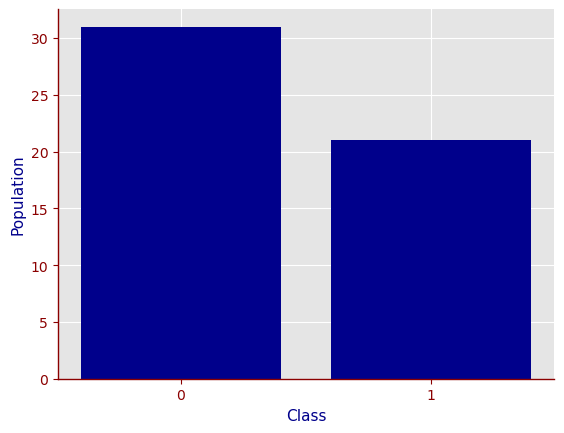

In [7]:
plot_class_dist(y)

## Self-created dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_RATIO,
    random_state=N_SEED,
    stratify=y,
)

### Create a model and fit data into the model

In [9]:
model_RFC = RandomForestClassifier(
    random_state=N_SEED,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
).fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


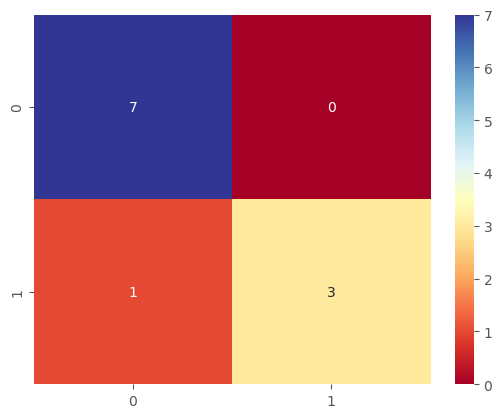

In [10]:
y_pred_RFC = model_RFC.predict(X_test)
y_prob_RFC = model_RFC.predict_proba(X_test) * 100
cm_RFC = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_RFC)
sns.heatmap(cm_RFC, annot=True, cmap=COLOR_MAP, fmt=".0f");

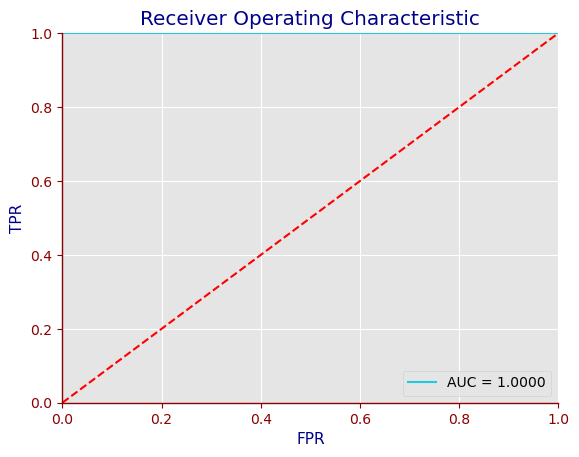

In [11]:
fpr_RFC, tpr_RFC, _ = metrics.roc_curve(y_test, y_prob_RFC[:, 1])
roc_auc_RFC = metrics.auc(fpr_RFC, tpr_RFC)
plot_roc(fpr_RFC, tpr_RFC, roc_auc_RFC)

In [12]:
model_GBC = GradientBoostingClassifier(
    random_state=N_SEED,
    verbose=VERBOSE,
).fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1670            0.11s
         2           1.0132            0.13s
         3           0.8857            0.09s
         4           0.7785            0.08s
         5           0.6870            0.07s
         6           0.6084            0.06s
         7           0.5403            0.05s
         8           0.4810            0.05s
         9           0.4290            0.04s
        10           0.3833            0.04s
        20           0.1314            0.03s
        30           0.0472            0.02s
        40           0.0172            0.02s
        50           0.0063            0.01s
        60           0.0023            0.01s
        70           0.0009            0.01s
        80           0.0003            0.00s
        90           0.0001            0.00s
       100           0.0000            0.00s


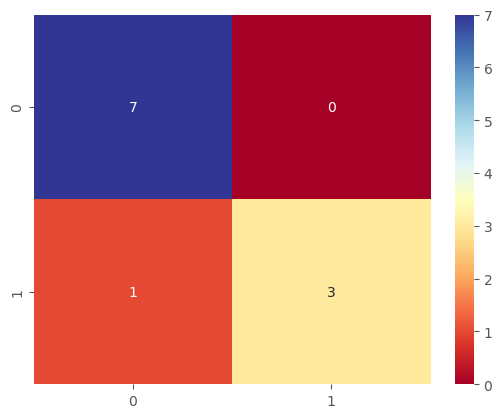

In [13]:
y_pred_GBC = model_GBC.predict(X_test)
y_prob_GBC = model_GBC.predict_proba(X_test) * 100
cm_GBC = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_GBC)
sns.heatmap(cm_GBC, annot=True, cmap=COLOR_MAP, fmt=".0f");

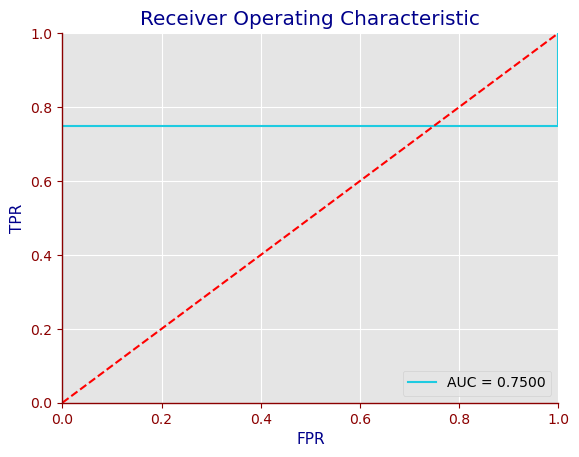

In [14]:
fpr_GBC, tpr_GBC, _ = metrics.roc_curve(y_test, y_prob_GBC[:, 1])
roc_auc_GBC = metrics.auc(fpr_GBC, tpr_GBC)
plot_roc(fpr_GBC, tpr_GBC, roc_auc_GBC)

In [15]:
params_XGB = {
    "n_jobs": N_JOBS,
    "verbosity": VERBOSE,
}

param_grid_XGB = {
    "eta": [0.3, 0.5],
    "max_depth": [6, 8, 10]
}

model_XGB = XGBClassifier(**params_XGB)

grid_search_cv_XGB = GridSearchCV(
    model_XGB,
    param_grid=param_grid_XGB,
    refit=True,
)

pipeline_XGB = make_pipeline(
    grid_search_cv_XGB,
)

pipeline_XGB.fit(X_train, y_train)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=4,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'eta': [0.3, 0.5],
                                          'max_depth': [6, 8, 10]}))])

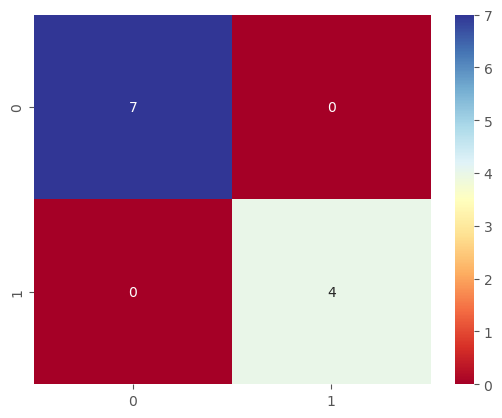

In [16]:
y_pred_XGB = pipeline_XGB.predict(X_test)
y_prob_XGB = pipeline_XGB.predict_proba(X_test) * 100
cm_XGB = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_XGB)
sns.heatmap(cm_XGB, annot=True, cmap=COLOR_MAP, fmt=".0f");

In [17]:
model_RFC.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9090909090909091

In [18]:
model_GBC.score(X_test, y_test)

0.9090909090909091

In [19]:
pipeline_XGB.score(X_test, y_test)

1.0

### Predict

In [20]:
y_pred_RFC = model_RFC.predict(X_test)
y_pred_RFC

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [21]:
y_pred_XGB = pipeline_XGB.predict(X_test)
y_pred_XGB

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


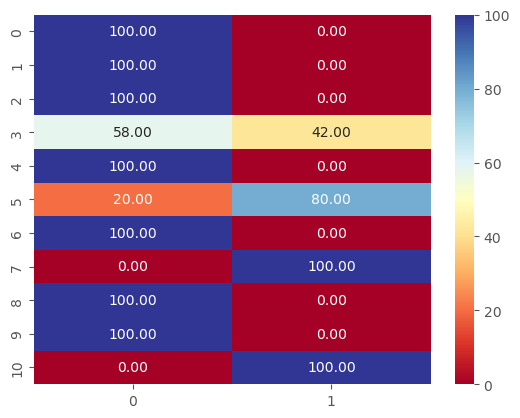

In [22]:
y_prob_RFC = model_RFC.predict_proba(X_test) * 100
sns.heatmap(y_prob_RFC, annot=True, cmap=COLOR_MAP, fmt=".2f");

In [23]:
y_pred_GBC = model_GBC.predict(X_test)
y_pred_GBC

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

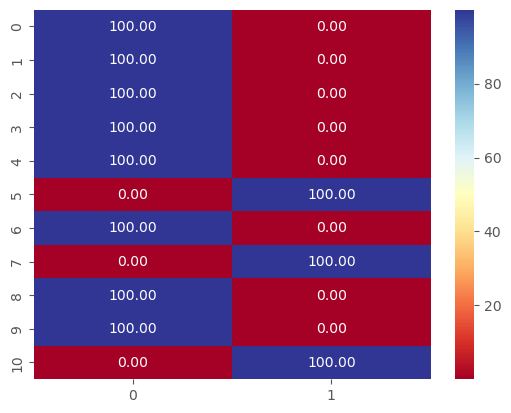

In [24]:
y_prob_GBC = model_GBC.predict_proba(X_test) * 100
sns.heatmap(y_prob_GBC, annot=True, cmap=COLOR_MAP, fmt=".2f");

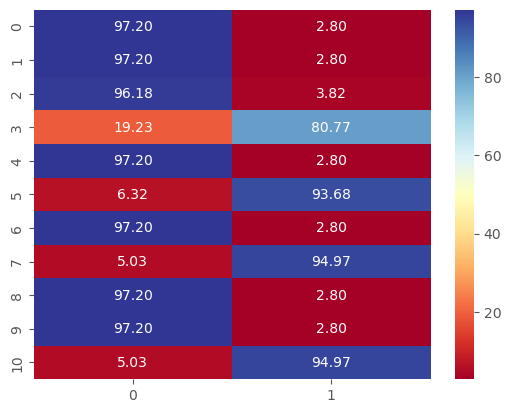

In [25]:
y_prob_XGB = pipeline_XGB.predict_proba(X_test) * 100
sns.heatmap(y_prob_XGB, annot=True, cmap=COLOR_MAP, fmt=".2f");

In [26]:
X_curve = (np.arange(230)*0.05 + 0.9).reshape(-1, 1)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


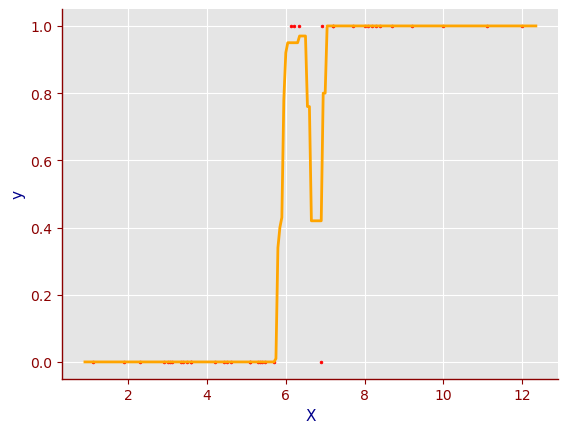

In [27]:
y_curve_RFC = model_RFC.predict_proba(X_curve)
plot_Xy2(
    X_train,
    y_train,
    X_curve.reshape(-1,),
    y_curve_RFC[:, 1],
)

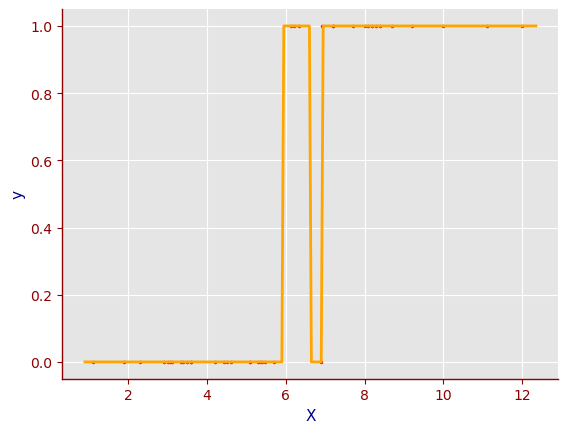

In [28]:
y_curve_GBC = model_GBC.predict_proba(X_curve)
plot_Xy2(
    X_train,
    y_train,
    X_curve.reshape(-1,),
    y_curve_GBC[:, 1],
)

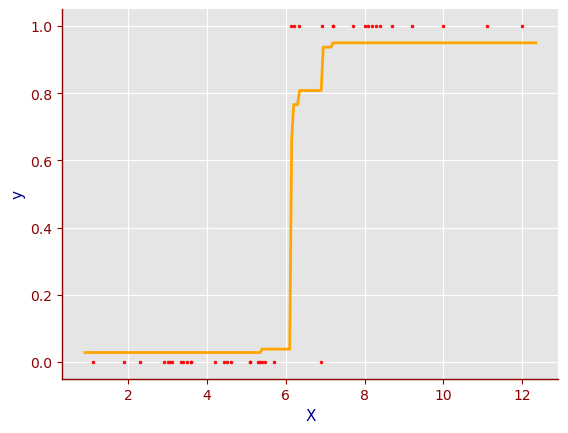

In [29]:
y_curve_XGB = pipeline_XGB.predict_proba(X_curve)
plot_Xy2(
    X_train,
    y_train,
    X_curve.reshape(-1,),
    y_curve_XGB[:, 1],
)

## Iris dataset (classification problem)

In [30]:
X1, y1 = load_iris(return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=N_SEED)

### EDA

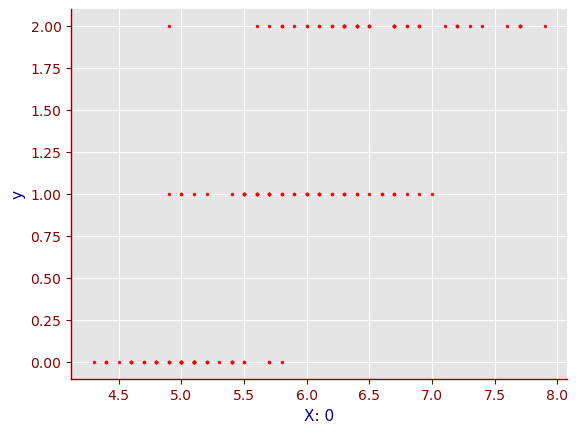

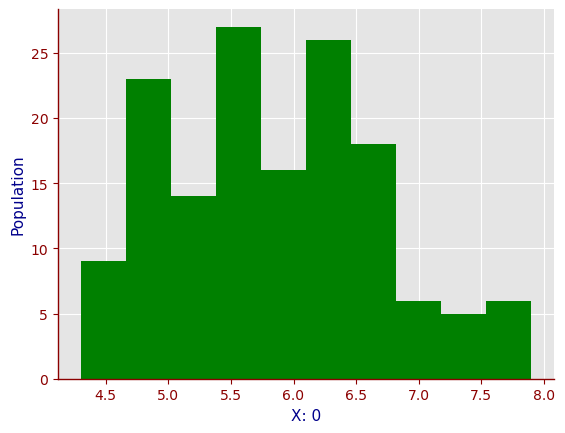

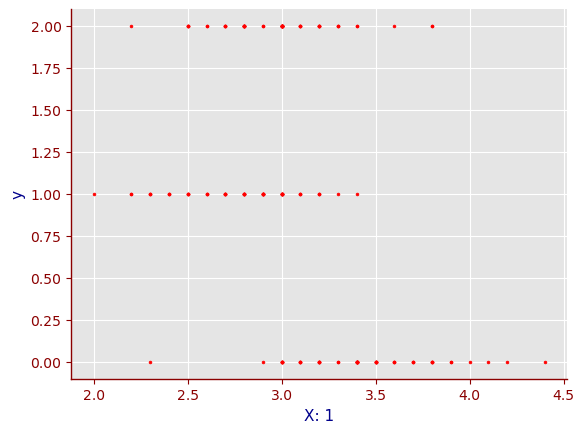

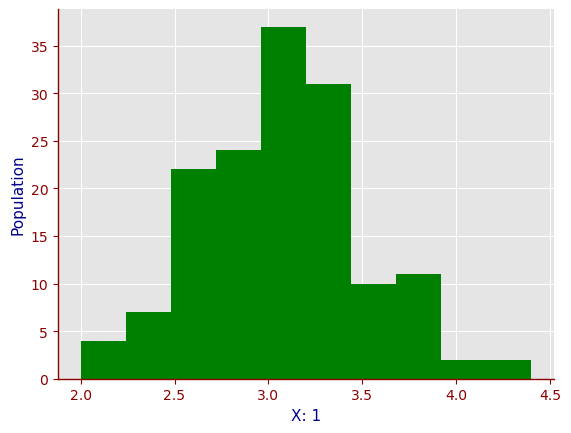

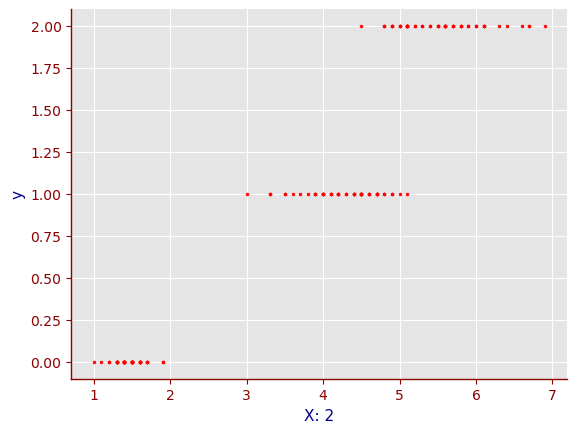

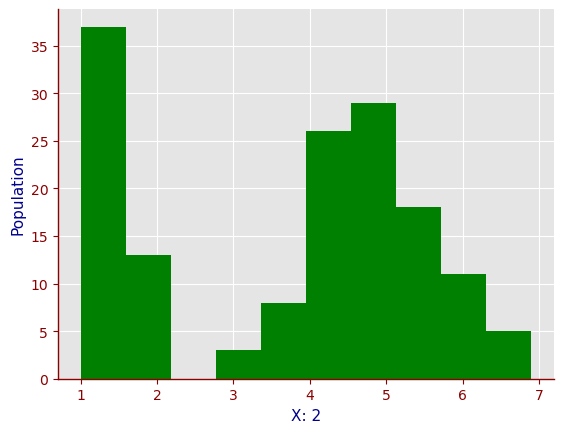

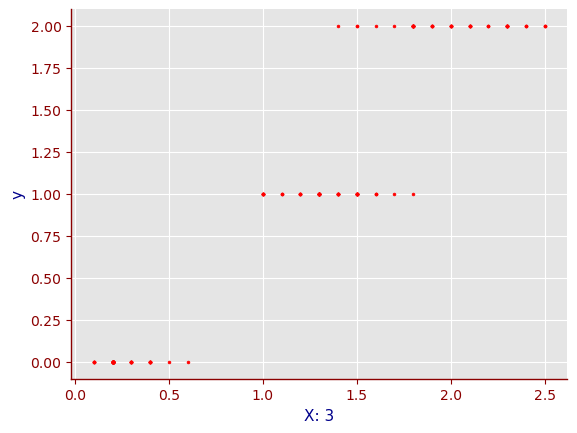

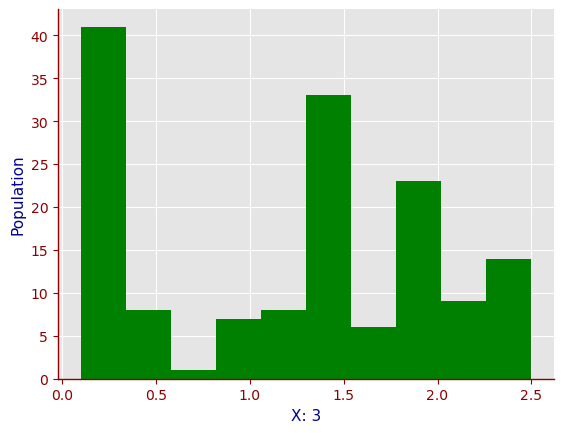

In [31]:
plot_features(X1, y1)

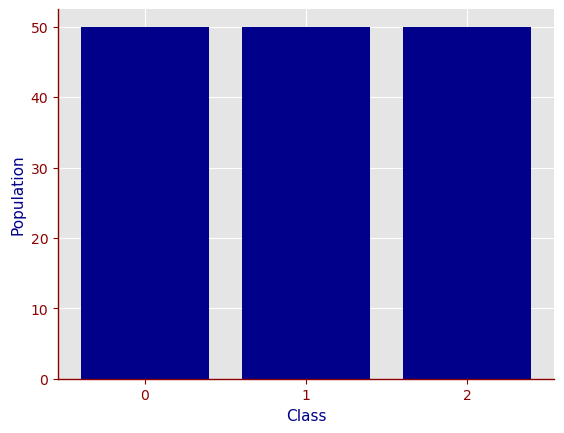

In [32]:
plot_class_dist(y1)

### Create a model and fit data into the model

In [33]:
rfc_model1 = RandomForestClassifier(
    random_state=N_SEED,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
).fit(X1_train, y1_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
gbc_model1 = GradientBoostingClassifier(
    random_state=N_SEED,
    verbose=VERBOSE,
).fit(X1_train, y1_train)

      Iter       Train Loss   Remaining Time 
         1           0.9164            0.18s
         2           0.7751            0.22s
         3           0.6616            0.17s
         4           0.5687            0.15s
         5           0.4917            0.13s
         6           0.4267            0.12s
         7           0.3718            0.12s
         8           0.3255            0.11s
         9           0.2854            0.11s
        10           0.2511            0.10s
        20           0.0779            0.08s
        30           0.0292            0.07s
        40           0.0128            0.06s
        50           0.0060            0.05s
        60           0.0031            0.04s
        70           0.0017            0.03s
        80           0.0008            0.02s
        90           0.0004            0.01s
       100           0.0002            0.00s


### Predict

In [35]:
y1_rfc_pred = rfc_model1.predict(X1_test)
y1_rfc_pred[:TOP_K]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 2, 1, 1, 0])

In [36]:
y1_gbc_pred = gbc_model1.predict(X1_test)
y1_gbc_pred[:TOP_K]

array([0, 2, 1, 1, 0])

In [37]:
y1_test[:TOP_K]

array([0, 2, 1, 1, 0])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


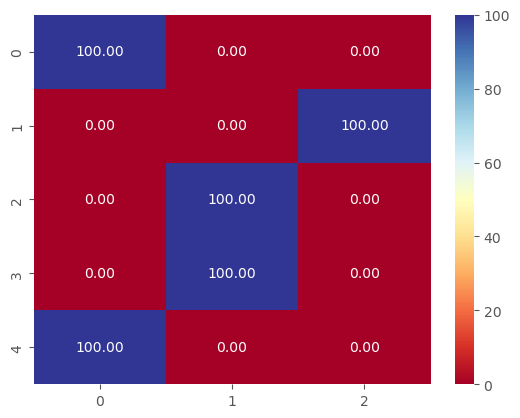

In [38]:
y1_rfc_p = rfc_model1.predict_proba(X1_test) * 100
sns.heatmap(y1_rfc_p[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

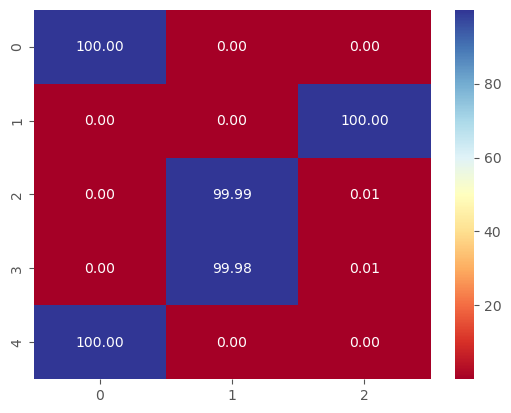

In [39]:
y1_gbc_p = gbc_model1.predict_proba(X1_test) * 100
sns.heatmap(y1_gbc_p[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

### Confusion Matrix

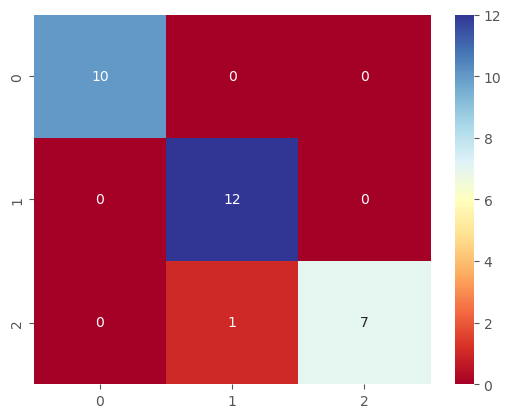

In [40]:
cm1_rfc = metrics.confusion_matrix(y_true=y1_test, y_pred=y1_rfc_pred)
sns.heatmap(cm1_rfc, annot=True, cmap=COLOR_MAP, fmt=".0f");

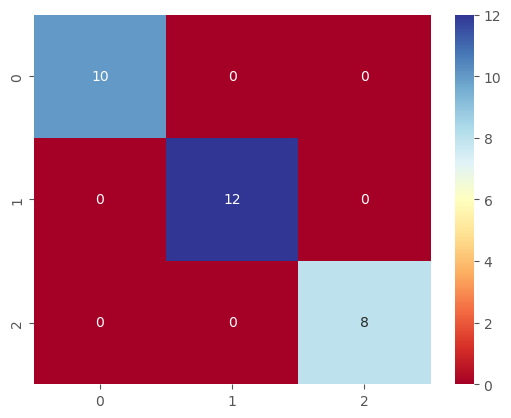

In [41]:
cm1_gbc = metrics.confusion_matrix(y_true=y1_test, y_pred=y1_gbc_pred)
sns.heatmap(cm1_gbc, annot=True, cmap=COLOR_MAP, fmt=".0f");

### Classification Report

In [42]:
Markdown(metrics.classification_report(y_true=y1_test, y_pred=y1_rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


In [43]:
Markdown(metrics.classification_report(y_true=y1_test, y_pred=y1_gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


# Ensemble Regression

In [44]:
X2, y2 = load_diabetes(return_X_y=True)

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=N_SEED)

### EDA

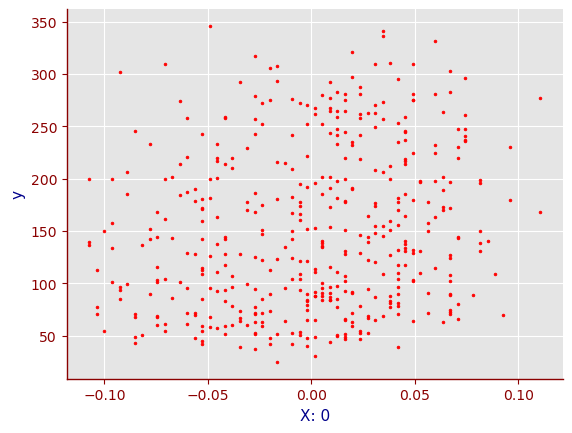

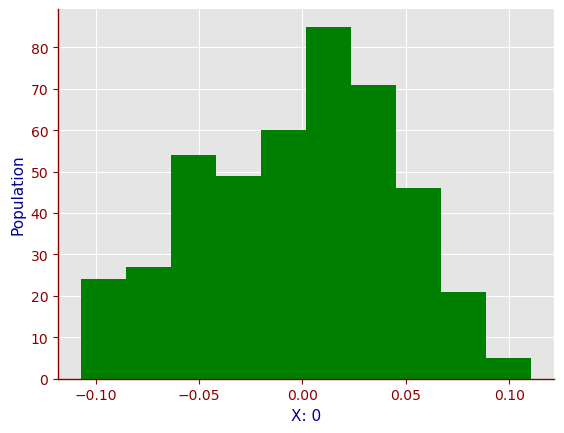

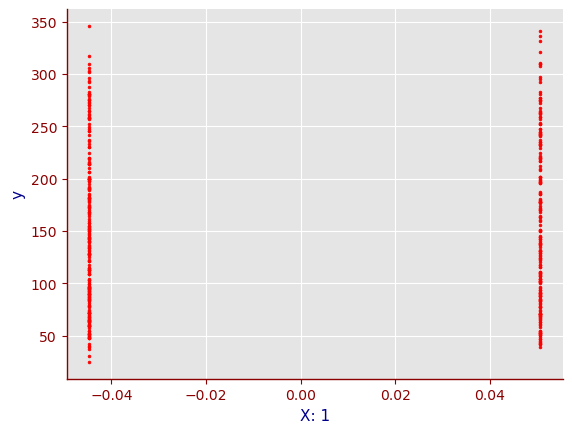

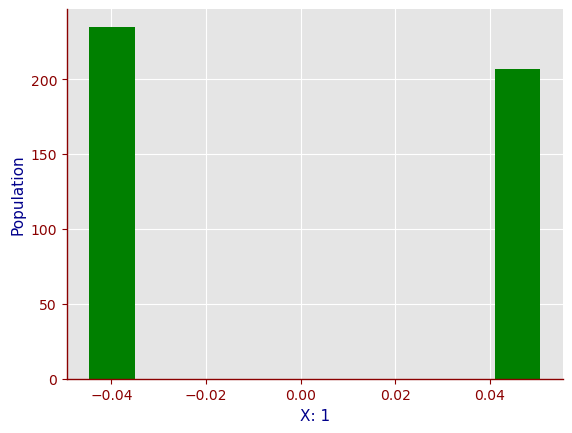

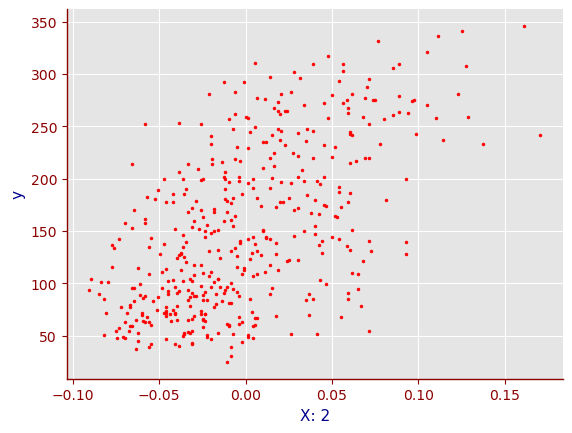

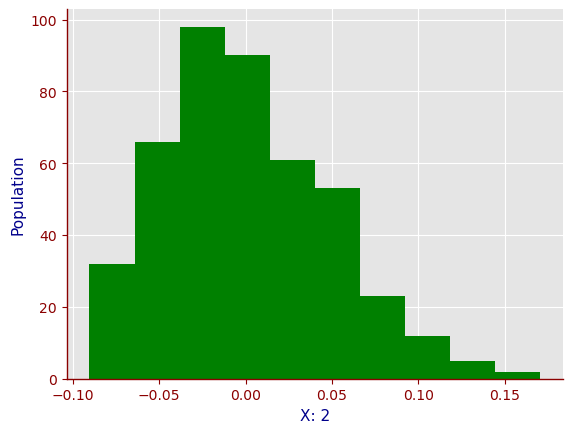

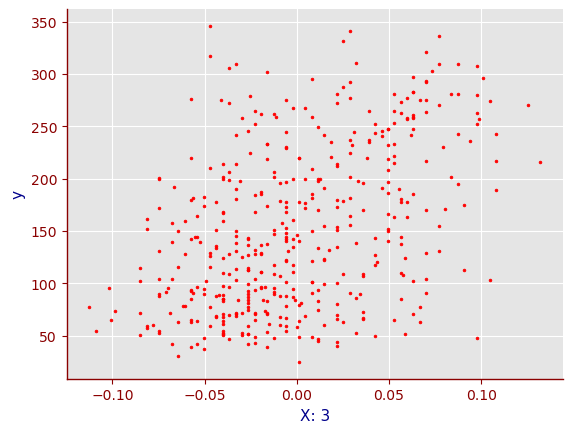

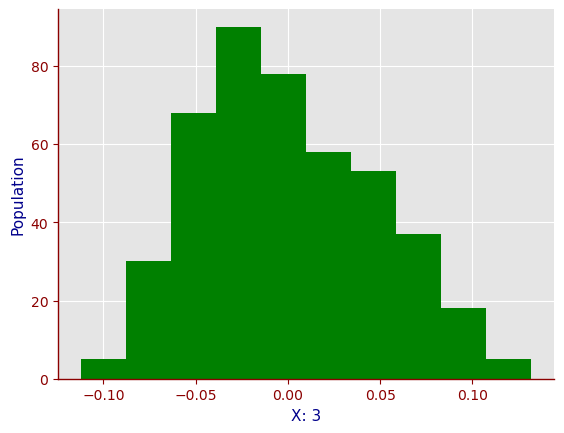

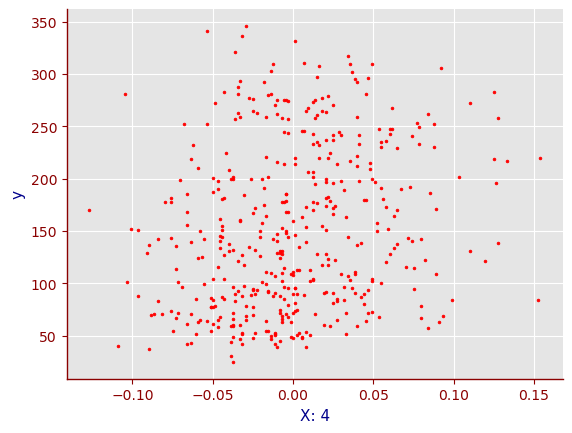

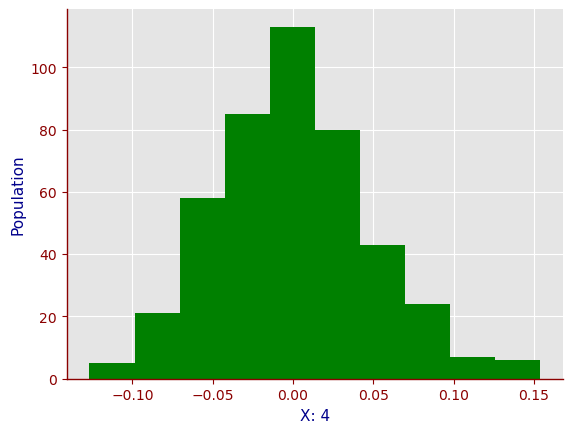

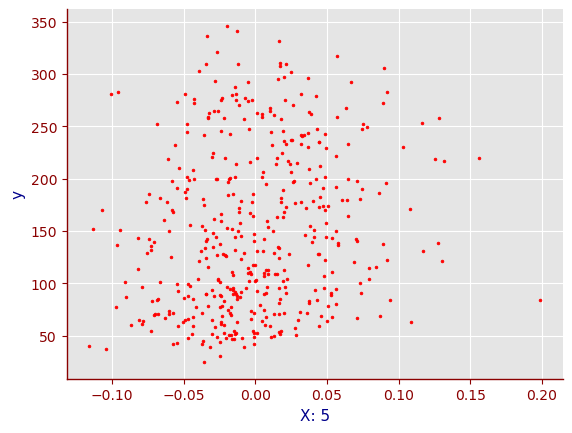

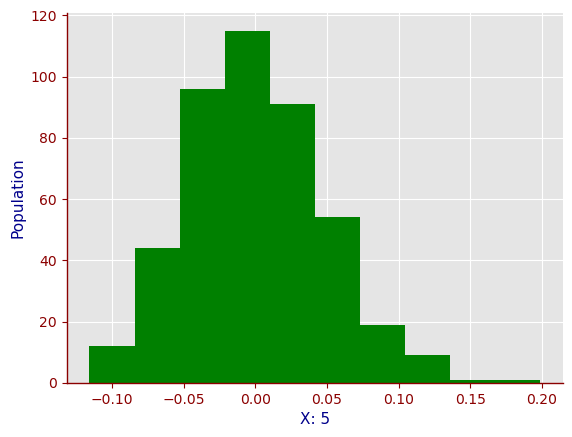

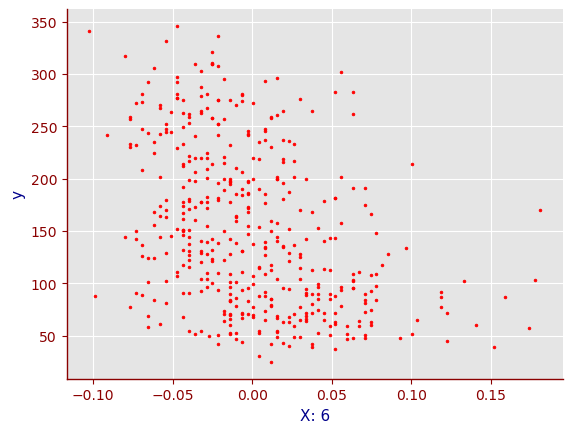

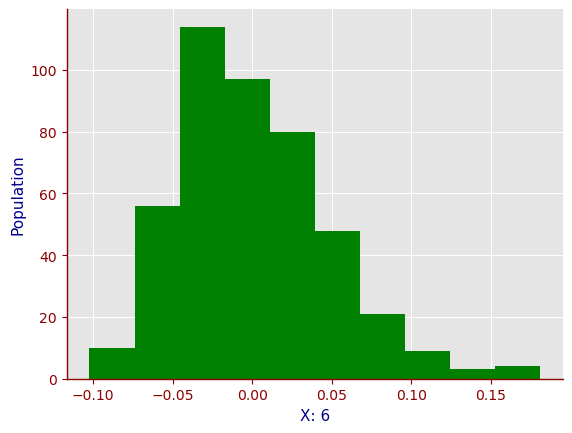

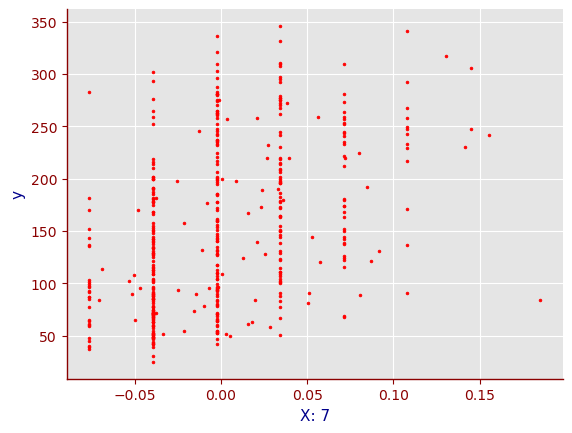

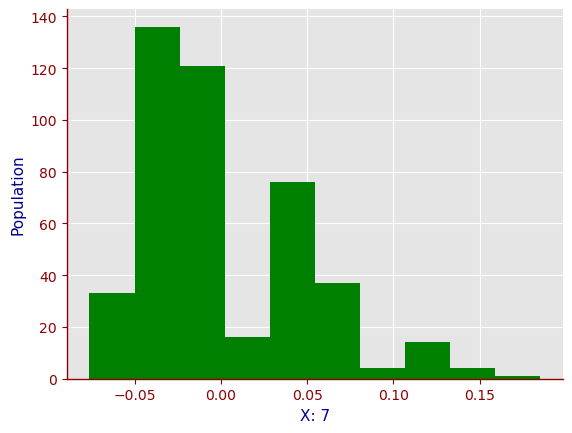

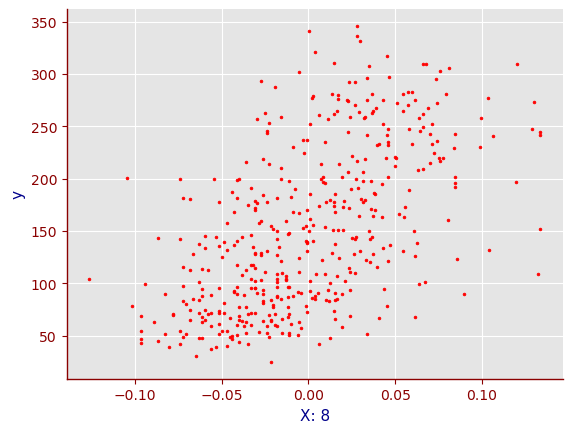

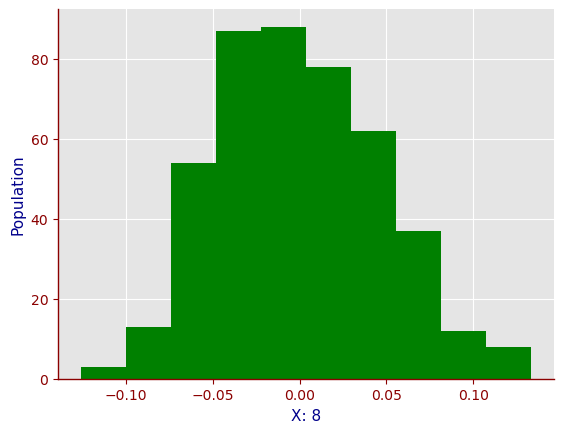

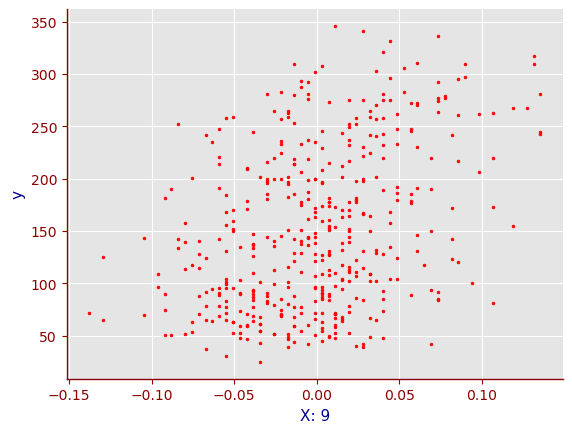

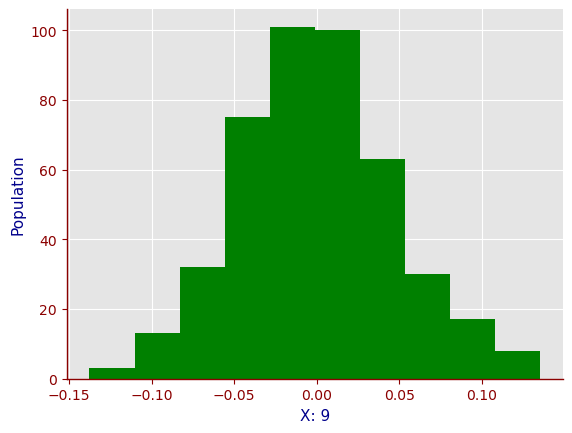

In [46]:
plot_features(X2, y2)

In [47]:
rfr_model = RandomForestRegressor(
    max_features=0.1,
    random_state=N_SEED,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
).fit(X2_train, y2_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [48]:
rfr_model.score(X2_train, y2_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9233716271154132

In [49]:
y2_rfr_pred = rfr_model.predict(X2_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [50]:
y2_rfr_pred[:TOP_K]

array([212.69, 224.49, 218.24, 156.5 , 142.11])

In [51]:
y2_test[:TOP_K]

array([268., 303., 186., 170., 109.])

In [52]:
metrics.root_mean_squared_error(y2_test, y2_rfr_pred)

61.73588832066461

In [53]:
metrics.mean_absolute_error(y2_test, y2_rfr_pred)

50.811797752808985